# Notebook to make Fig. 4

In [1]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import pylab

import json
import random
import sys 
import os

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.lines import Line2D

from fig_helper_functions import *

style.use('plotting.mplstyle')

### Load data

In [2]:
# Load in the predicted and observed draws 
f_root = '../Data/PopulationInferenceOutput/'
with open(f_root+'pred_vs_obs_spins_dict_pp.json', 'r') as f: 
    pred_vs_obs_spins = json.load(f)

### Make Figure

In [3]:
# Labels corresponding to each pop
labels_dict = {
    'pop1':r'$\mathrm{\textsc{HighSpinPrecessing}}$', 
    'pop2':r'$\mathrm{\textsc{MediumSpin}}$', 
    'pop3':r'$\mathrm{\textsc{LowSpinAligned}}$'
}

# Colors corresponding to different numbers of events
nevents_colors_dict = {
    '70events':'#d0856a', 
    '330events':'#B13306', 
}

# For legend
legend_handles = [Line2D([], [], color=c, label=l[:-6]+' '+l[-6:]) for l,c in nevents_colors_dict.items()]

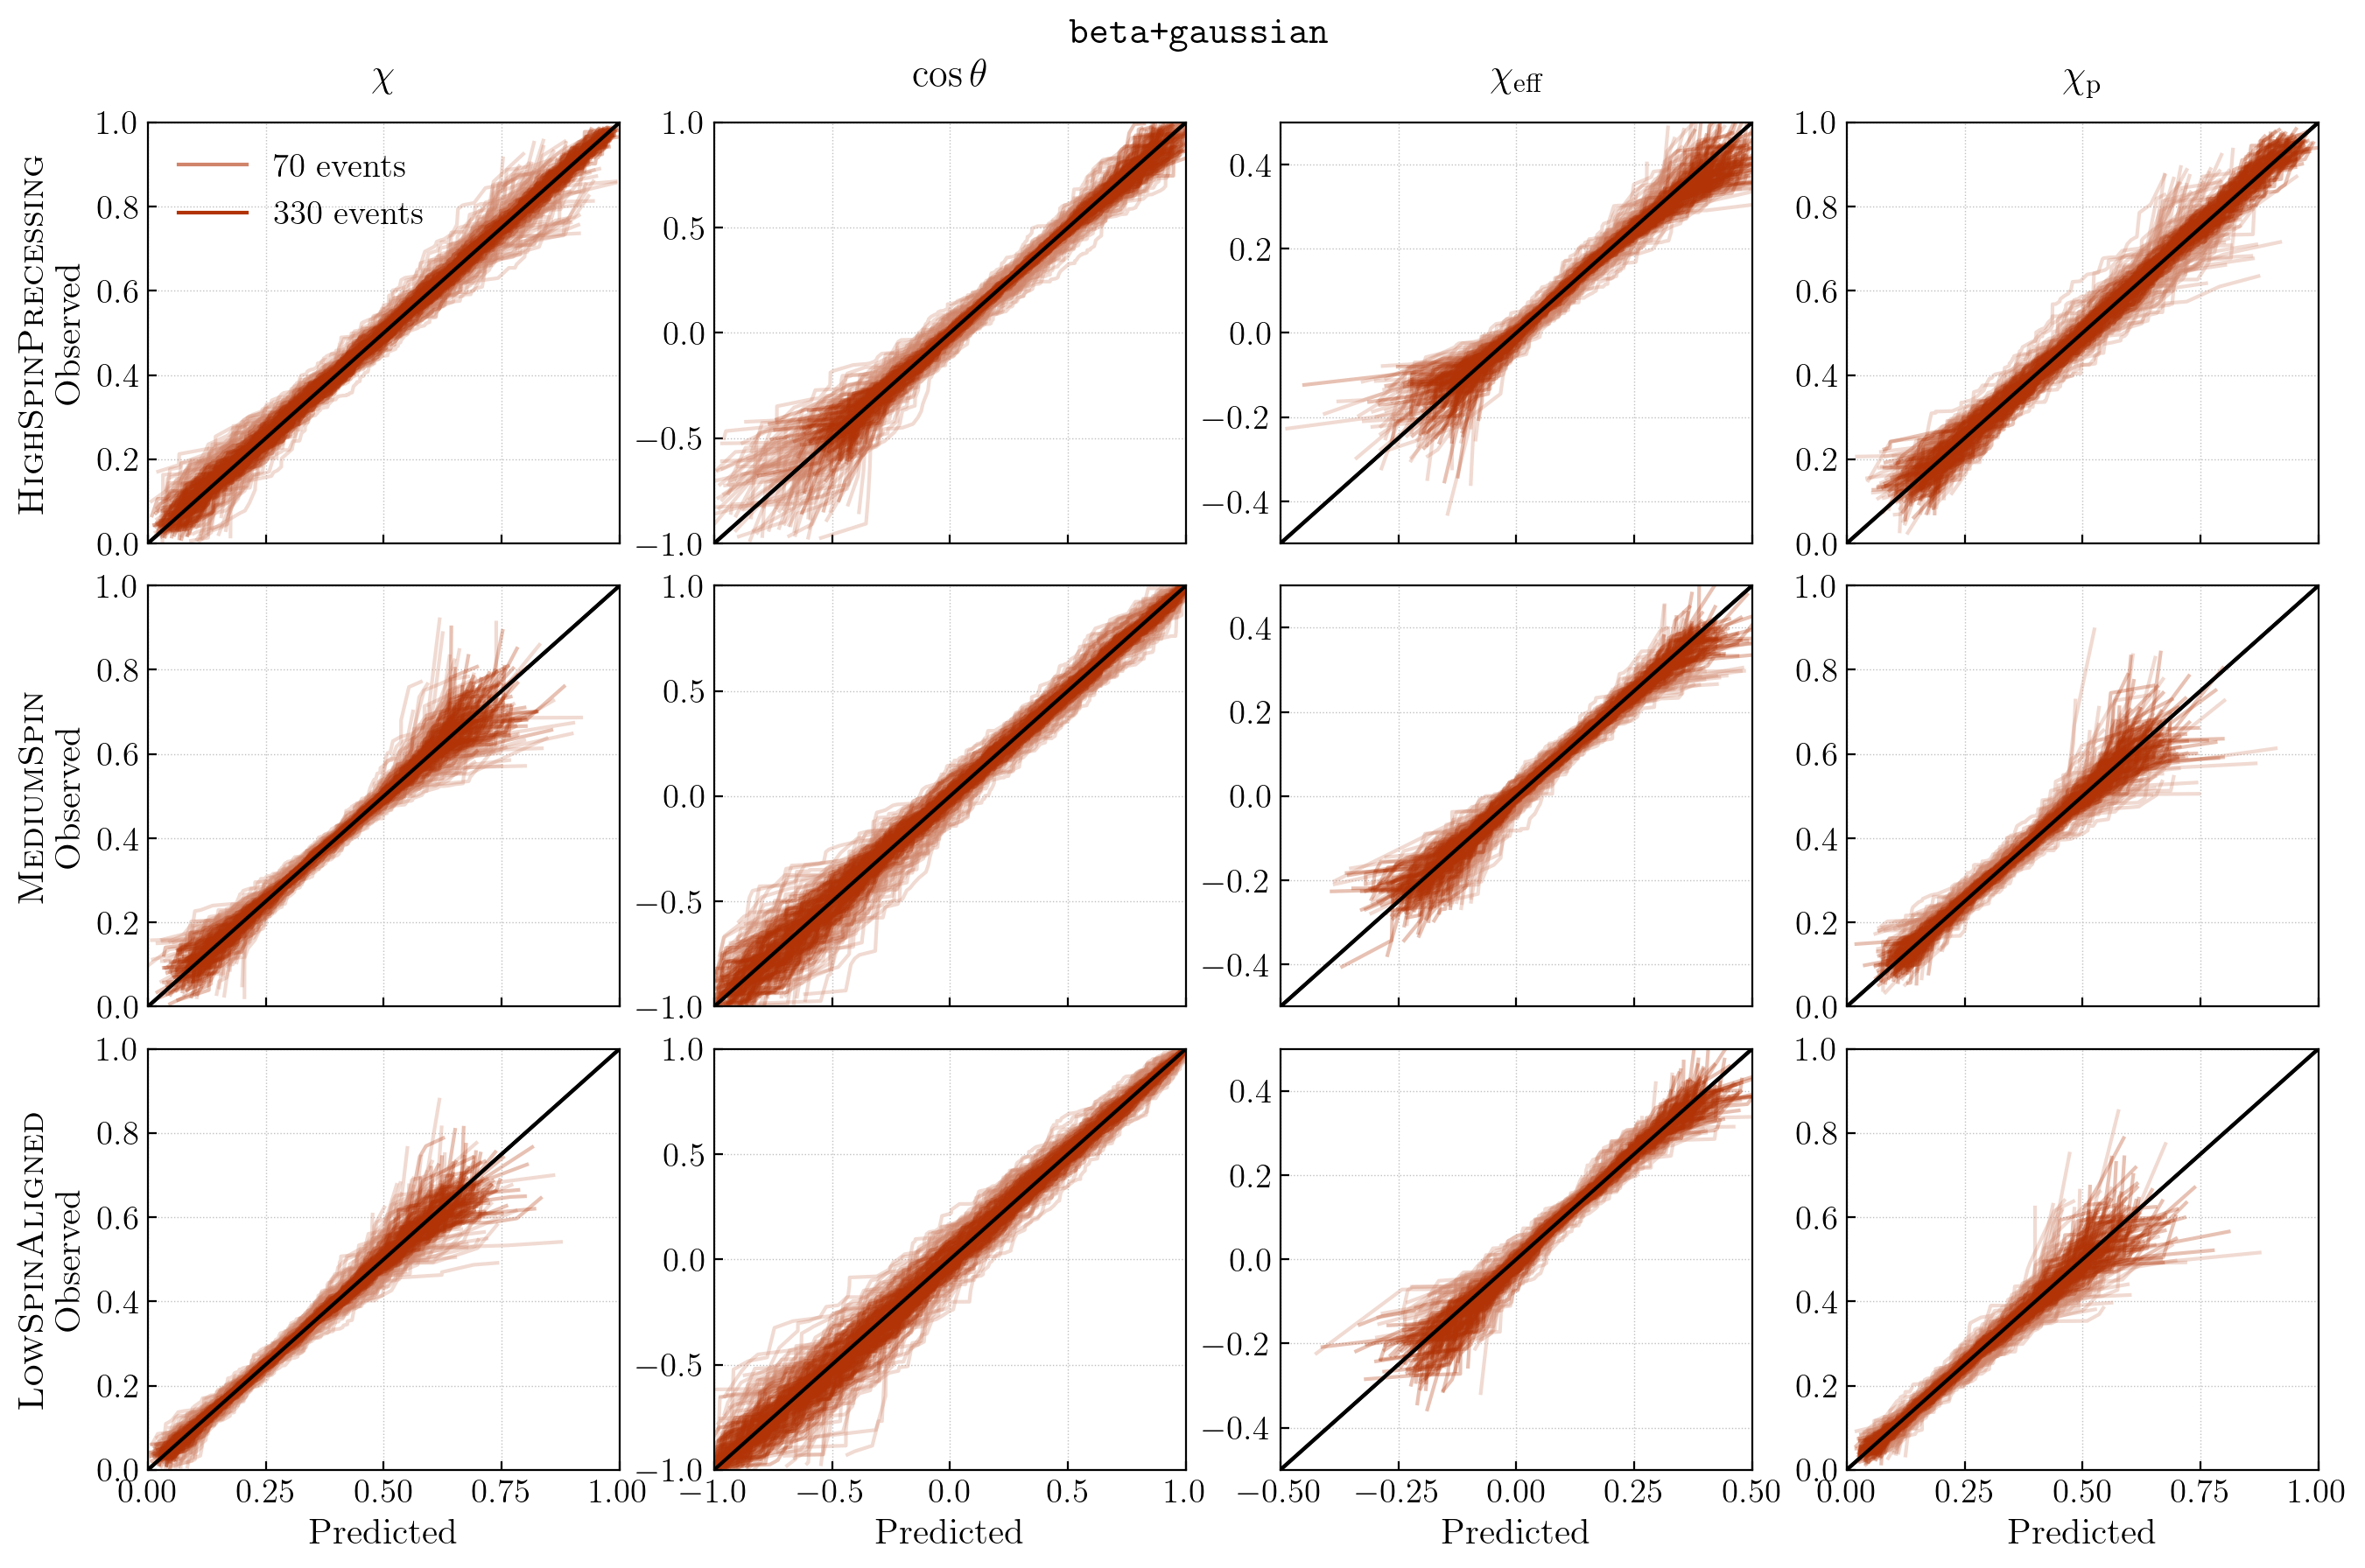

In [4]:
nCatalogs_to_plot = 100

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,10))

for i,key in enumerate(labels_dict.keys()):
    
    for nkey in nevents_colors_dict.keys():
    
        # spin magnitudes
        for j in range(nCatalogs_to_plot):
            chi_pred = np.concatenate((pred_vs_obs_spins[key][nkey]['predicted']['chi1'][j], 
                                       pred_vs_obs_spins[key][nkey]['predicted']['chi2'][j]))
            chi_obs = np.concatenate((pred_vs_obs_spins[key][nkey]['observed']['chi1'][j], 
                                      pred_vs_obs_spins[key][nkey]['observed']['chi2'][j]))
            axes[i][0].plot(np.sort(chi_pred), np.sort(chi_obs), alpha=0.3, c=nevents_colors_dict[nkey])
        axes[i][0].plot([0, 1], [0, 1], color='k') # diagonal line
        axes[i][0].set_xlim(0,1)
        axes[i][0].set_ylim(0,1)

        # tilt angles
        for j in range(nCatalogs_to_plot):
            cost_pred = np.concatenate((pred_vs_obs_spins[key][nkey]['predicted']['cost1'][j], 
                                        pred_vs_obs_spins[key][nkey]['predicted']['cost2'][j]))
            cost_obs = np.concatenate((pred_vs_obs_spins[key][nkey]['observed']['cost1'][j], 
                                       pred_vs_obs_spins[key][nkey]['observed']['cost2'][j]))
            axes[i][1].plot(np.sort(cost_pred), np.sort(cost_obs), alpha=0.3, c=nevents_colors_dict[nkey])
        axes[i][1].plot([-1, 1], [-1, 1], color='k')
        axes[i][1].set_xlim(-1,1)
        axes[i][1].set_ylim(-1,1)

        # chieff
        for j in range(nCatalogs_to_plot):
            axes[i][2].plot(np.sort(pred_vs_obs_spins[key][nkey]['predicted']['chieff'][j]), 
                            np.sort(pred_vs_obs_spins[key][nkey]['observed']['chieff'][j]), alpha=0.3, 
                            c=nevents_colors_dict[nkey])
        axes[i][2].plot([-1, 1], [-1, 1], color='k')
        axes[i][2].set_xlim(-0.5, 0.5)
        axes[i][2].set_ylim(-0.5, 0.5)

        # chip
        for j in range(nCatalogs_to_plot):
            axes[i][3].plot(np.sort(pred_vs_obs_spins[key][nkey]['predicted']['chip'][j]), 
                            np.sort(pred_vs_obs_spins[key][nkey]['observed']['chip'][j]), alpha=0.3, 
                            c=nevents_colors_dict[nkey])
        axes[i][3].plot([0, 1], [0, 1], color='k')
        axes[i][3].set_xlim(0,1)
        axes[i][3].set_ylim(0,1)

    # set label
    axes[i][0].set_ylabel(f'{labels_dict[key]}\nObserved', fontsize=15)

    if i!=2: 
        for ax in axes[i]: 
            ax.set_xticklabels([])
    else: 
        for ax in axes[i]: 
            ax.set_xlabel('Predicted', fontsize=15)
    
axes[0][0].set_title(r'$\chi$', fontsize=16, y=1.05)
axes[0][1].set_title(r'$\cos\theta$', fontsize=16, y=1.05)
axes[0][2].set_title(r'$\chi_\mathrm{eff}$', fontsize=16, y=1.05)
axes[0][3].set_title(r'$\chi_\mathrm{p}$', fontsize=16, y=1.05)

for ax in axes: 
    for a in ax:
        a.grid(ls=':', color='silver', lw=0.5)
        
plt.subplots_adjust(hspace=0.1)

# Add suptitle
plt.suptitle(r'$\mathrm{\texttt{beta+gaussian}}$', fontsize=16, y=0.94)

# Add legend
axes[0][0].legend(handles=legend_handles, loc='upper left')

plt.savefig('figure_04_temp.pdf', bbox_inches='tight')
plt.show()

Plot $\chi_i$ and $\cos\theta_i$ separately

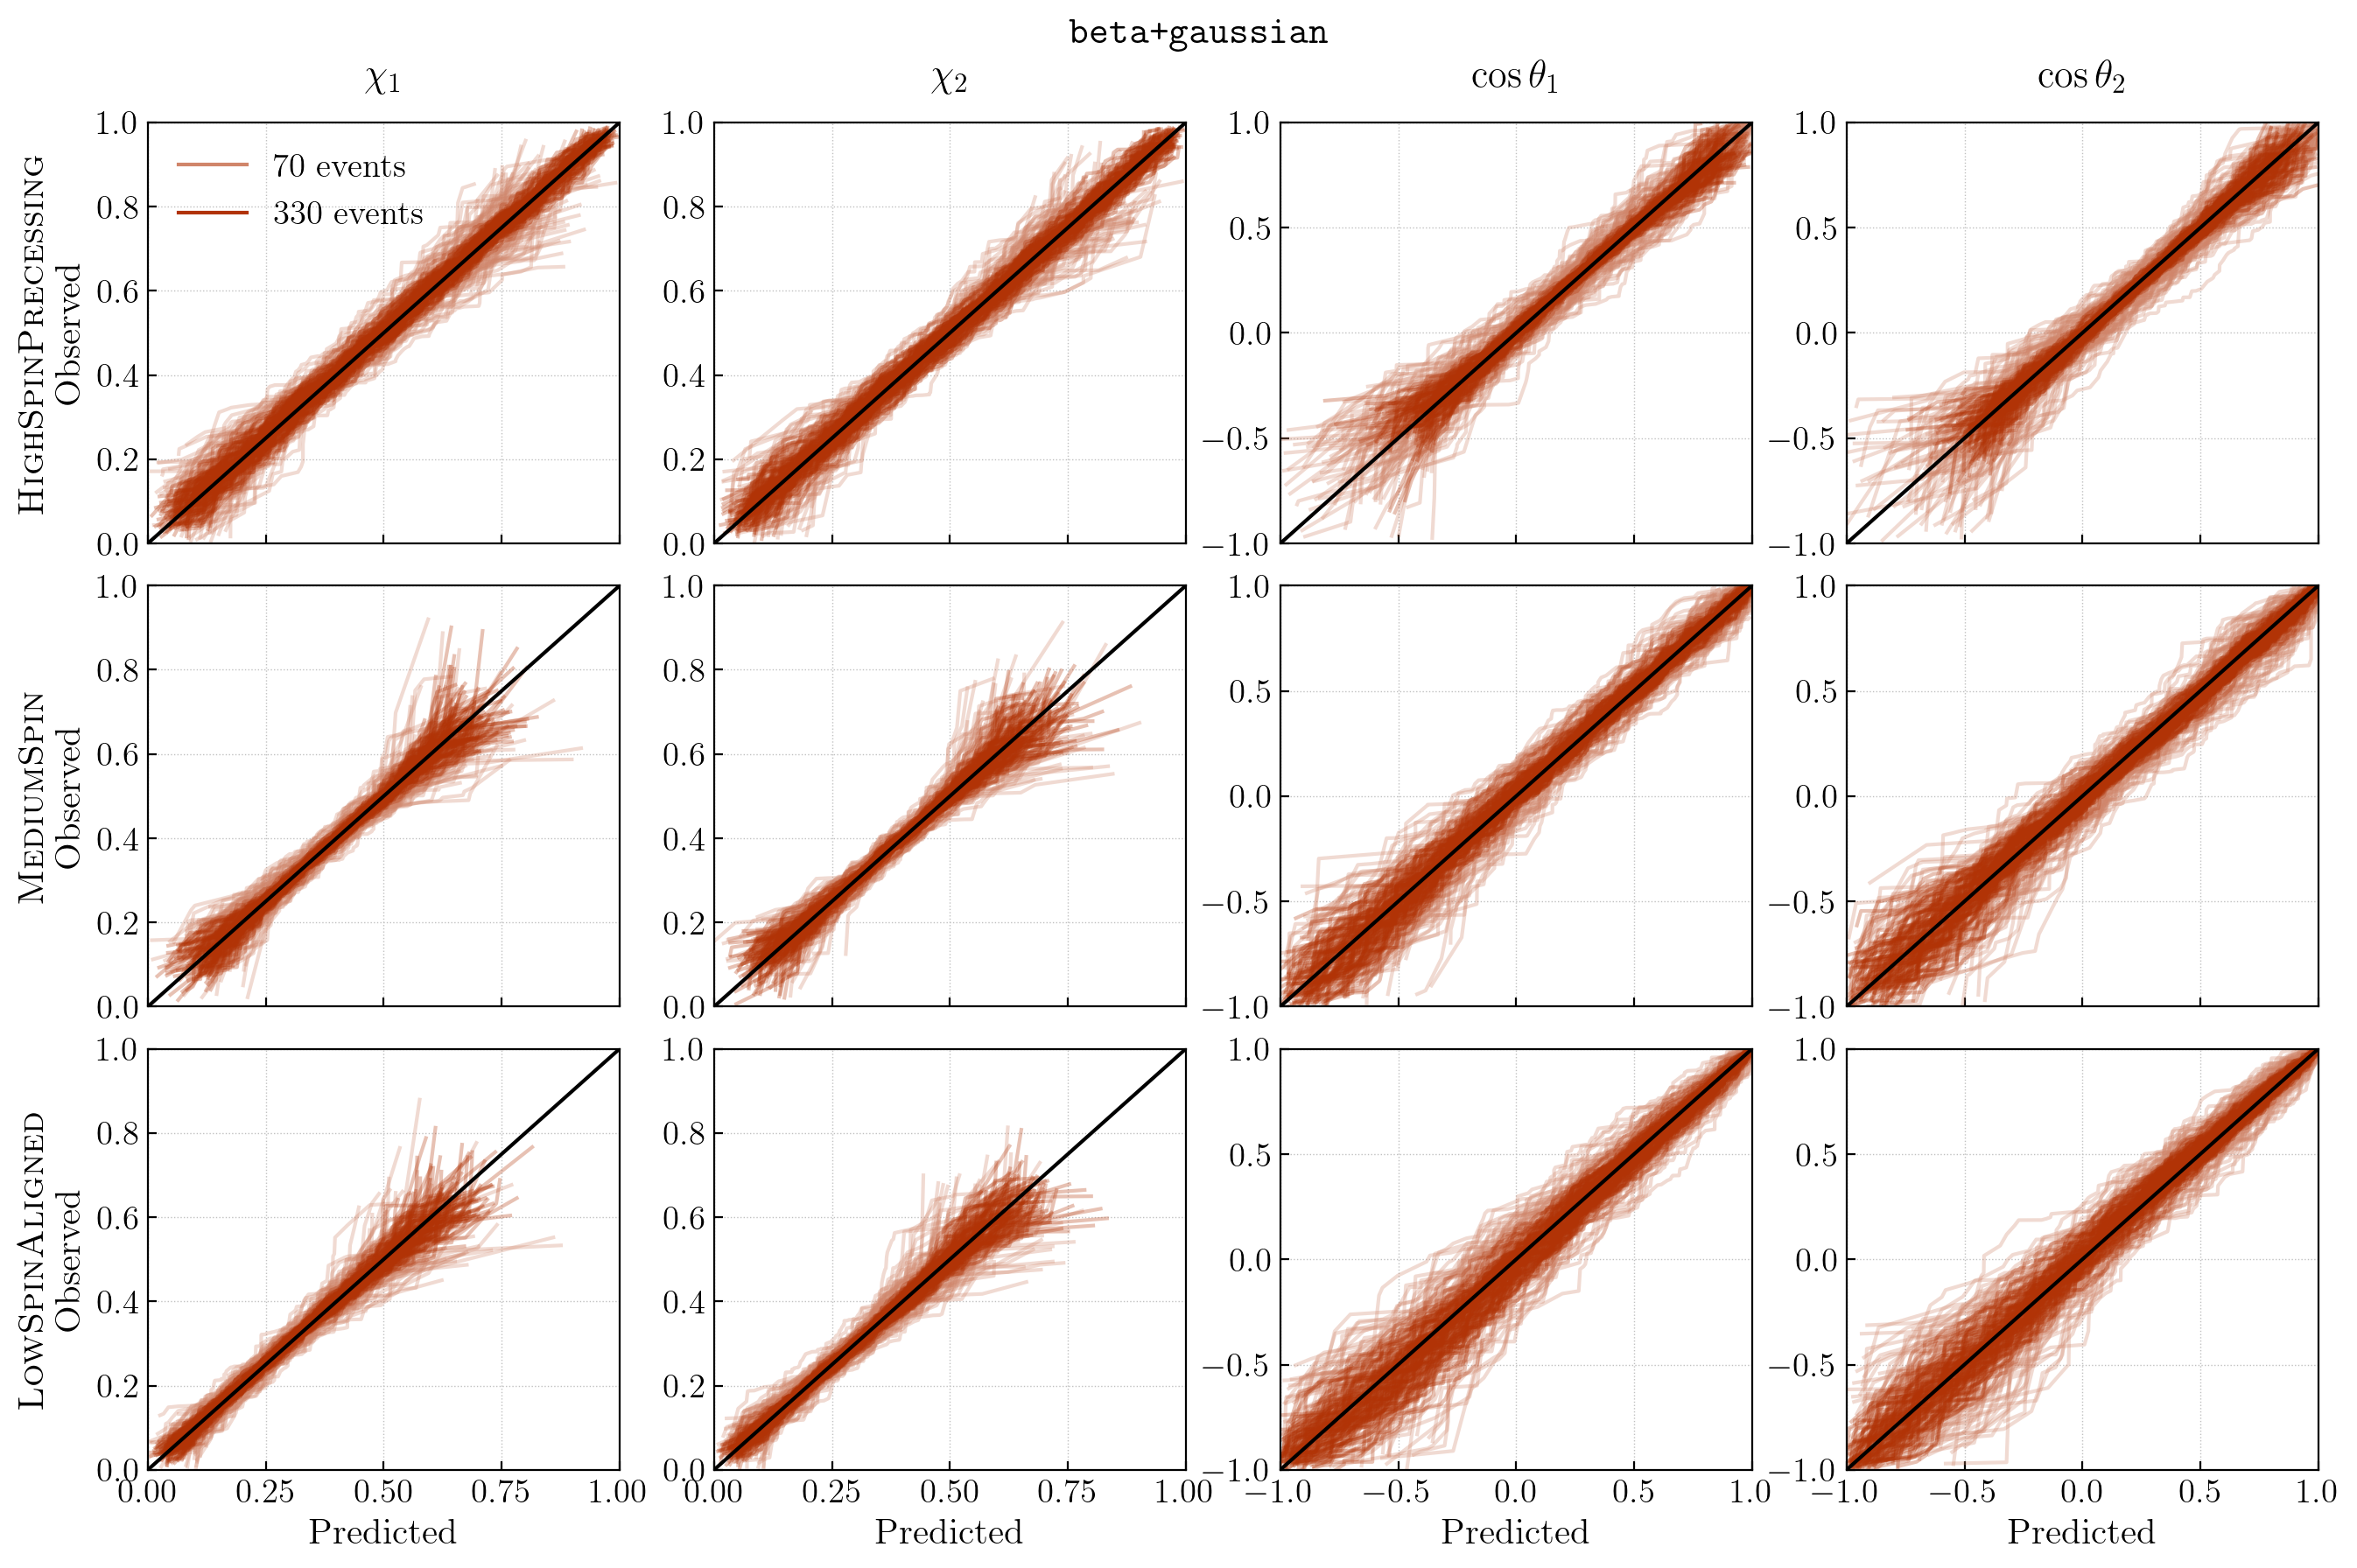

In [17]:
nCatalogs_to_plot = 100

chi_lims = [0, 1]
cost_lims = [-1, 1]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,10))

for i,key in enumerate(labels_dict.keys()):
    
    for nkey in nevents_colors_dict.keys():
    
        #  chi1
        for j in range(nCatalogs_to_plot):
            
            # chi1
            axes[i][0].plot(np.sort(pred_vs_obs_spins[key][nkey]['predicted']['chi1'][j]), 
                            np.sort(pred_vs_obs_spins[key][nkey]['observed']['chi1'][j]), alpha=0.3, 
                            c=nevents_colors_dict[nkey])
        
            #  chi2
            axes[i][1].plot(np.sort(pred_vs_obs_spins[key][nkey]['predicted']['chi2'][j]), 
                            np.sort(pred_vs_obs_spins[key][nkey]['observed']['chi2'][j]), alpha=0.3, 
                            c=nevents_colors_dict[nkey])
            # cost1
            axes[i][2].plot(np.sort(pred_vs_obs_spins[key][nkey]['predicted']['cost1'][j]), 
                            np.sort(pred_vs_obs_spins[key][nkey]['observed']['cost1'][j]), alpha=0.3, 
                            c=nevents_colors_dict[nkey])
    
            # cost2
            axes[i][3].plot(np.sort(pred_vs_obs_spins[key][nkey]['predicted']['cost2'][j]), 
                            np.sort(pred_vs_obs_spins[key][nkey]['observed']['cost2'][j]), alpha=0.3, 
                            c=nevents_colors_dict[nkey])
        
    # set label
    axes[i][0].set_ylabel(f'{labels_dict[key]}\nObserved', fontsize=15)
    
    # set axes lims
    for j in [0,1]:
        axes[i][j].plot(chi_lims, chi_lims, color='k')
        axes[i][j].set_xlim(*chi_lims)
        axes[i][j].set_ylim(*chi_lims)
    
    for j in [2,3]:
        axes[i][j].plot(cost_lims, cost_lims, color='k')
        axes[i][j].set_xlim(*cost_lims)
        axes[i][j].set_ylim(*cost_lims)

    if i!=2: 
        for ax in axes[i]: 
            ax.set_xticklabels([])
    else: 
        for ax in axes[i]: 
            ax.set_xlabel('Predicted', fontsize=15)
    
axes[0][0].set_title(r'$\chi_1$', fontsize=16, y=1.05)
axes[0][1].set_title(r'$\chi_2$', fontsize=16, y=1.05)
axes[0][2].set_title(r'$\cos \theta_1$', fontsize=16, y=1.05)
axes[0][3].set_title(r'$\cos \theta_2$', fontsize=16, y=1.05)

for ax in axes: 
    for a in ax:
        a.grid(ls=':', color='silver', lw=0.5)
        
plt.subplots_adjust(hspace=0.1)

# Add suptitle
plt.suptitle(r'$\mathrm{\texttt{beta+gaussian}}$', fontsize=16, y=0.94)

# Add legend
axes[0][0].legend(handles=legend_handles, loc='upper left')

plt.show()